<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/notebooks/04_model_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

### Data

⚠️ **NOTE:** Kaggle files have already been uploaded to the repo. You find them in folder `kaggle_data`´

If you for any reason need to download data from kaggle, instructions are in one of the [optional notebooks](./88_kaggle_data.ipynb) : <a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/notebooks/88_kaggle_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/STASYA00/IAAC2024_tutorials
%cd IAAC2024_tutorials/notebooks

In [2]:
# importing the necessary packages
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
metadata = pd.read_csv("../kaggle_data/tutorial_results/01_metadata.csv", index_col=0)
metadata.head()

,building_id,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,timezone,electricity,hotwater,water,gas,industry,subindustry,heatingtype,yearbuilt,numberoffloors,occupants,rating
136,432,3,0,2,4703.0,1,0,0,0,0,0,2,11,NaN,5.0,NaN,1.0
137,416,3,0,2,499.3,1,0,1,0,0,0,2,7,NaN,4.0,NaN,0.0
138,436,3,0,2,9061.0,1,0,0,0,0,0,2,7,2005.0,10.0,NaN,2.0
139,441,3,0,3,7579.0,1,0,0,0,0,0,2,7,1913.0,5.0,NaN,0.0
140,442,3,0,3,5295.0,1,0,1,0,0,0,2,7,1953.0,6.0,NaN,1.0


In [92]:
target = "occupants"
X = metadata.drop(columns=[target]).loc[metadata[target].isna()==False]
Y = metadata[target].loc[metadata[target].isna()==False]
X_test = metadata.drop(columns=[target]).loc[metadata[target].isna()==True]
Y_test = metadata[target].loc[metadata[target].isna()==True]

In [93]:
X.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

## 🏡 Buildings' Efficiency - First models

### Introduction

The easiest way to think about the models is pairing. We pair input to output.

There are many types of data (numbers, categories, images, 3D data, video, music, text ...). ML models allow us to "link" different data types. We can define what we have as "in" data and what we want to transform it into (or pair it with). 

Different models make different kinds of "pairing".

<img src="../.assets/io.png" height="800px"/>

We will start with the models that pair numerical and categorical data.

### 🫧 Linear Regression

[Model reference](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

#### 🪸 Visual

[![Linear Regression and Least Squares](https://img.youtube.com/vi/S0ptaAXNxBU?si=BzE5kEflCQWdenp6&t=35/0.jpg)](https://youtu.be/S0ptaAXNxBU?si=BzE5kEflCQWdenp6&t=35)

#### Our data

<Axes: xlabel='sqm', ylabel='occupants'>

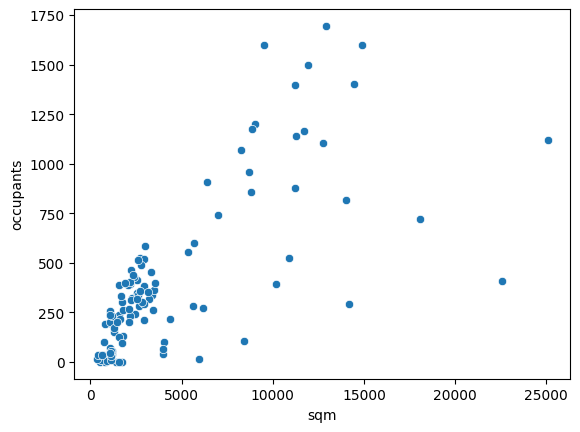

In [28]:
sns.scatterplot(x = X["sqm"], y = Y)

We can see that there is some dependency between these two variables. How should we draw the line?

In [ ]:
x_coords = [[0, 13000],[0, 17000],[0, 2500]]

fig, axes = plt.subplot(1, 3)
for i in range(3):
    sns.scatterplot(x = X["sqm"], y = Y, ax=axes[i])
    sns.lineplot(x=x_coords[i], y=[0, 1500], color=(1, 0,0 ), ax=axes[i])

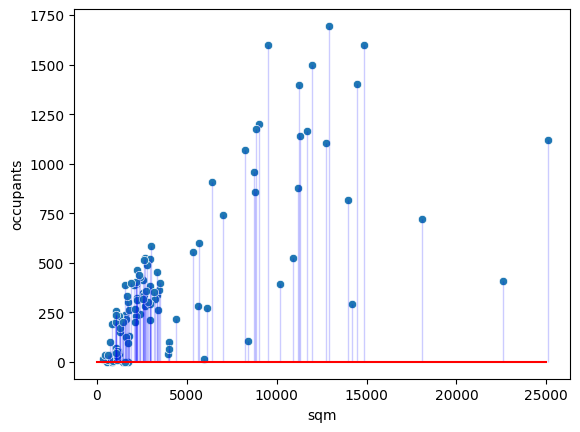

In [48]:
ax = sns.scatterplot(x = X["sqm"], y = Y)

sns.lineplot(x=[0,25000], y=[0, 0], color=(1, 0,0 ), ax=ax)
for x, y in zip(X["sqm"], Y):
    y_coord = 0 * x
    sns.lineplot(x=[x, x], y=[y_coord, y], color = (0,0,1))

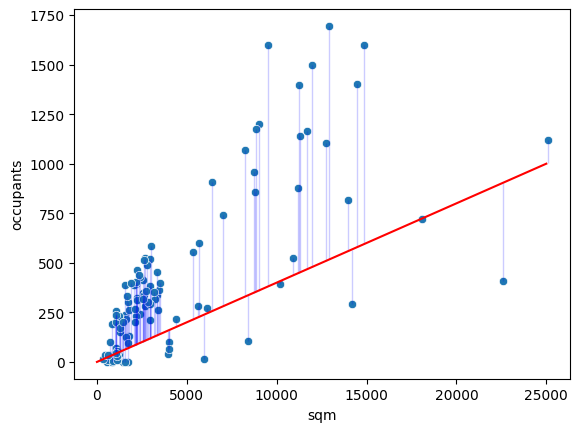

In [43]:
ax = sns.scatterplot(x = X["sqm"], y = Y)

sns.lineplot(x=[0,25000], y=[0, 1000], color=(1, 0,0 ), ax=ax)
for x, y in zip(X["sqm"], Y):
    y_coord = 1 / 25 * x
    sns.lineplot(x=[x, x], y=[y_coord, y], color = (0,0,1))

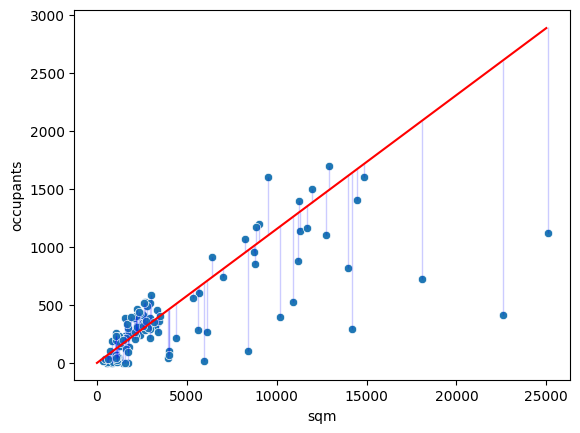

In [44]:
ax = sns.scatterplot(x = X["sqm"], y = Y)

sns.lineplot(x=[0,25000], y=[0, 25000 * 3 / 26], color=(1, 0,0 ), ax=ax)
for x, y in zip(X["sqm"], Y):
    y_coord = 3 / 26 * x
    sns.lineplot(x=[x, x], y=[y_coord, y], color = (0,0,1))

#### ⚙️ Code

In [5]:
from sklearn.linear_model import LinearRegression

In [51]:
features = ["sqm"]
reg = LinearRegression().fit(X[features], Y)
score = reg.score(X[features], Y)
res = reg.predict(X_test[features])
print(res.min(), res.max())
print("SCORE: {}".format(score))


160.56256765873155 1688.4200714603717
SCORE: 0.5235844512405314


In [55]:
print(reg.predict([[0]]))
print(reg.predict([[1], [0]]))

/home/sta/envs/capacity/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([138.59076377])

#### 🎢 Result

/home/sta/envs/capacity/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Score: 0.5235844512405314


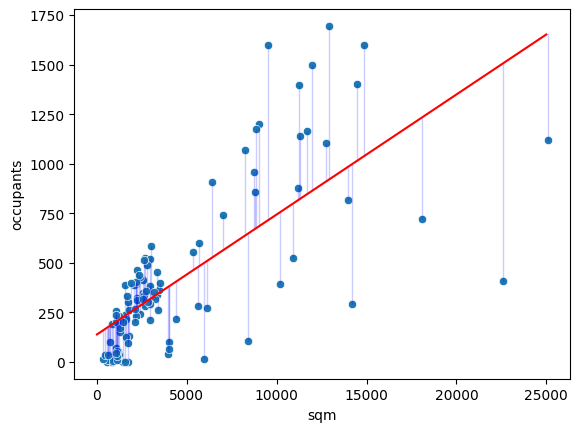

In [83]:

x = [0, 25000]
train_predict = reg.predict(X[features])

ax = sns.scatterplot(x = X["sqm"], y = Y)

sns.lineplot(x=x, y=reg.predict(np.array(x).reshape(-1,1)), color=(1, 0, 0 ), ax=ax)
for i, (x, y) in enumerate(zip(X["sqm"], Y)):
    y_coord = reg
    sns.lineplot(x=[x, x], y=[train_predict[i], y], color = (0,0,1))
print("Score: {}".format(reg.score(X[features], Y)))

#### 🧩 Task I - Combining features

Combining several features might give better results. Try using several different features in this regression model and see how the score changes

In [ ]:
features = []  # columns you want to use for the linear regression

reg = # Your code here

score = reg.score(X[features], Y)
print("SCORE: {}".format(score))

#### ⚙️ Solution

We can look at several different examples:

In [85]:
features = ["sqm", "numberoffloors"]  # columns you want to use for the linear regression

reg = LinearRegression().fit(X[features], Y)

score = reg.score(X[features], Y)
print("Score: {}".format(score))

Score: 0.5724718793778509


0.57 is a significant improvement from 0.52! What happens if we add one more?

In [90]:
features = ["sqm", "numberoffloors", "primaryspaceusage"]  # columns you want to use for the linear regression

reg = LinearRegression().fit(X[features], Y)

score = reg.score(X[features], Y)
print("Score: {}".format(score))

Score: 0.6527497995853112


Even better! What happens if we add all the features?

In [86]:
reg = LinearRegression().fit(X, Y)
score = reg.score(X, Y)
print("Score: {}".format(score))

Score: 0.712802559251777


0.71, an even bigger increase. Look at what results different column combinations give. Note, sometimes adding more columns can bring worse results.

### 🫧 Decision Tree

[Model reference](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

We still have quite a big error in our predictions. And here we were looking at a feature that did have some correlation with the target variable. Let's look at other features:

<Axes: xlabel='numberoffloors', ylabel='occupants'>

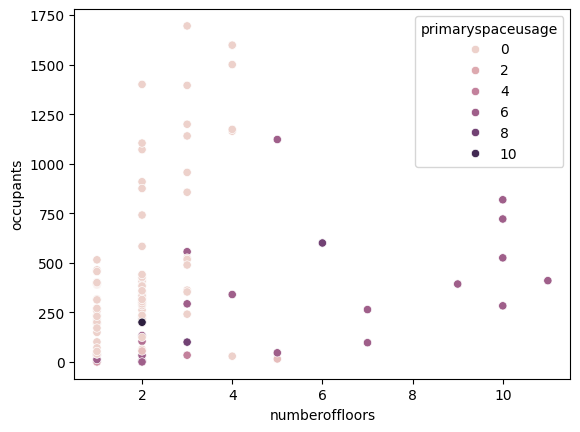

In [23]:
sns.scatterplot(x = X["numberoffloors"], y = Y,hue=X["primaryspaceusage"])

Applying regression here would result in negative values. Can the amount of occupants be negative?

A decision tree helps to capture more complex relationships in data. The idea is, however, simple: a set of binary questions to be answered:

![decision tree illustration](https://cdn-images-1.medium.com/max/778/1*OLJWt9hD2zTS-x3gRhYuqg.png)

#### ⚙️ Code

In [101]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# DecisionTreeClassifier for classification

model = DecisionTreeRegressor().fit(X, Y)
model = model.fit(X, Y)

#### 🪸 Visual

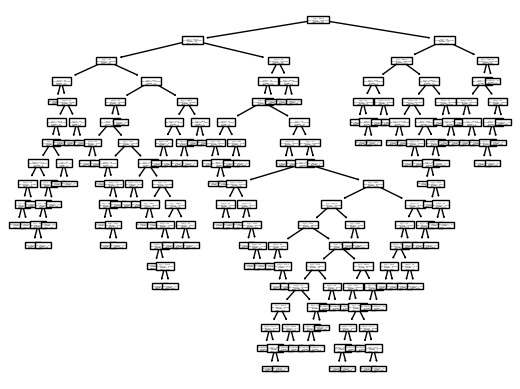

In [103]:
_ = tree.plot_tree(model)

Let's see how the tree changes based on different parameters that we use:

**Amount of tree levels**

Score: 0.8111049776637805


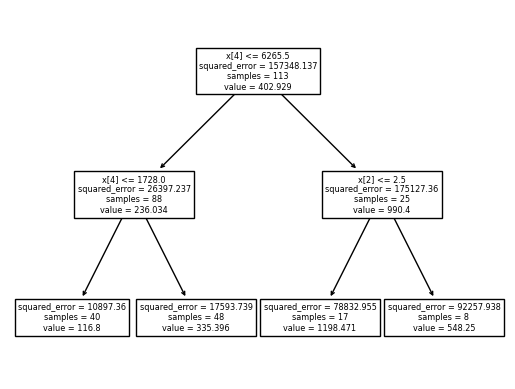

In [107]:
model = DecisionTreeRegressor(max_depth=2).fit(X, Y)
model = model.fit(X, Y)
print("Score: {}".format(model.score(X, Y)))
_ = tree.plot_tree(model)

Score: 0.8887800137779058


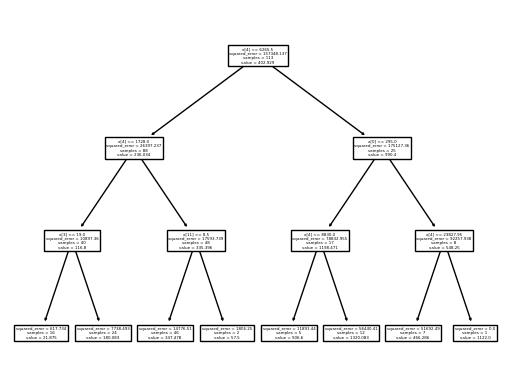

In [108]:
model = DecisionTreeRegressor(max_depth=3).fit(X, Y)
model = model.fit(X, Y)
print("Score: {}".format(model.score(X, Y)))
_ = tree.plot_tree(model)

**Minimum amount of samples left at the end of each branch (leaf)**

Score: 0.8048663212949875


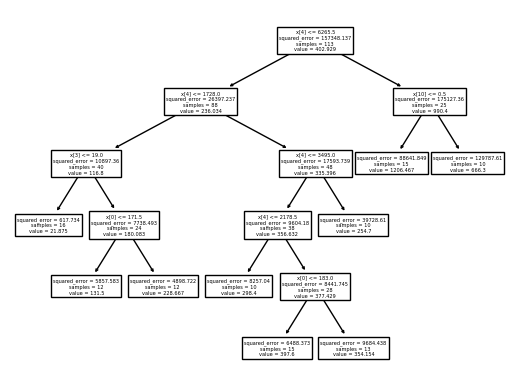

In [109]:
model = DecisionTreeRegressor(min_samples_leaf=10).fit(X, Y)
model = model.fit(X, Y)
print("Score: {}".format(model.score(X, Y)))
_ = tree.plot_tree(model)

If we look at the score of the first decision tree, we will see that it equals to 1.0. Does it mean we have found the perfect solution?

This phenomenon is known as [overfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html). We will come to it later.

### 🫧 Random Forest

[Model reference](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

Using decision tree causes complications in the choice of parameters. It is not easy to determine which are best suitable for each problem. We can draw an analogy of a tree being a doctor facing a complex problem. We don't really know how this doctor's knowledge _fits_ to the patient's condition.

One of the solutions was to use a _consortium_ of doctors, each of them having limited knowledge on a small aspect of the more complex issue.

Random forest is a forest of shallow trees that make a decision together.

#### 🪸 Visual

![Random forest analogy](../.assets/random_forest.jpg)

_Image credits: [Pierluca Lanzi](https://www.slideshare.net/pierluca.lanzi/dmtm-lecture-10-classification-ensembles)_

#### ⚙️ Code

In [116]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10).fit(X, Y)

In [117]:
print("Score: {}".format(model.score(X, Y)))

Score: 0.964880033796263


Here we can see which features are considered to be the most important according to our consortium:

In [120]:
model.feature_importances_

array([1.12704647e-01, 5.94851690e-04, 2.17438192e-02, 4.07625393e-02,
       7.60084951e-01, 0.00000000e+00, 3.11156000e-06, 0.00000000e+00,
       0.00000000e+00, 8.52915731e-03, 7.91958649e-03, 8.11795213e-03,
       1.84733407e-05, 1.09364158e-02, 1.64712448e-02, 1.21132500e-02])

### 🫧 Boosting

[Model reference](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor)

#### 🪸 Visual

Boosting exploits the same idea of using a consortium of doctors. The difference is that they all act collaboratively:

![Boosting1](../.assets/boosting1.jpg)
![Boosting2](../.assets/boosting2.jpg)

_Image credits: [Pierluca Lanzi](https://www.slideshare.net/pierluca.lanzi/dmtm-lecture-10-classification-ensembles)_

#### ⚙️ Code

In [121]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0).fit(X,Y)
print("Score: {}".format(model.score(X,Y)))

Score: 0.9908078729156145


### 🫧 Clustering

Oftentimes we do not have the Y-labels for our data. Or we want to capture more complex relationships in our data by grouping them together. That's when clustering comes into play.

#### 🫧 KMEANS

[Model reference](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

##### 🪸 Visual

[![Clustering](https://www.imperva.com/blog/wp-content/uploads/sites/9/2017/07/k-means-clustering-on-spherical-data-1v2.png)](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

![](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

##### ⚙️ Code

In [122]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1
 0 1]


#### 🫧 DBSCAN

[Model reference](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

##### 🪸 Visual

[![DBSCAN Clustering](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F071b3ee2-5df1-4900-8539-a55d2ee18d8e_3221x2180.png)](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

_Image credits: [DailydoseofDS](https://www.blog.dailydoseofds.com/p/the-limitations-of-dbscan-clustering)_

##### ⚙️ Code

In [125]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=100, min_samples=2).fit(X)
clustering.labels_

array([ 0,  1,  2,  2, -1,  3,  0,  0,  4, -1, -1,  5, -1, -1,  4, -1, -1,
        6, -1,  0,  1, -1,  5, -1,  6,  7,  3,  8,  2,  3,  1,  1,  9,  1,
        1, -1, 10, 11,  6, 10, 12, 10,  1,  1, 10, -1, 10,  1,  1, -1, 10,
       12, 10,  1, -1, 10, -1, 12, -1, 12,  3,  7, 13, -1, -1,  1, 14,  6,
       -1,  1, -1, -1, -1,  8,  6, 14, 13, -1, -1,  1, 13, 10, 12,  8, -1,
       -1,  1, 10,  8, 11, -1, -1, 12, -1, -1,  9, 10,  9, -1, -1,  1,  1,
        1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1])

### 🧬 Resources

* [mlcourse.ai](https://mlcourse.ai/book/index.html)